# Исследование объявлений о продаже квартир



Целью настоящего исследования является изучение рынка недвижимости и его динамики в Санкт-Петербурге и Ленинградской области. Для этого на основе имеющихся данных необходимо выявить факторы, оказывающие наиболее значительное влияние на стоимость квартир. Полученные выводы могут быть в дальнейшем использованы бизнесом для автоматизации поиска и выявления аномалий и мошенничества.
В процессе своего исследования я планирую осуществить следующие шаги:
1. Открыть файл с данными, изучить информацию о них, оценить возможные ошибки.
2. Обработать пропуски и ошибки, где это представится возможным для минимизации их влияния на результат исследования.
3. Добавить в таблицу новые данные на основе произведенных рассчетов, в некоторых столбцах - изменить тип данных, чтобы облегчить работу с ними, а также использовать их для дальнейшего анализа с максимальной пользой.
4. Произвести анализ зависимости целевой переменной (стоимости объектов) от указанных в таблице параметров, визуализировать полученные выводы для наглядности.
5. Оценить рыночную стоимость квартир для Санкт-Петербурга и населенных пунктов в области, выявить отличия в цене для разных регионов, а также на различном удалении от центра города.
6. Суммировать полученную информацию и выявленные закономерности, а также выдвинуть гипотезы в общем выводе.

### Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

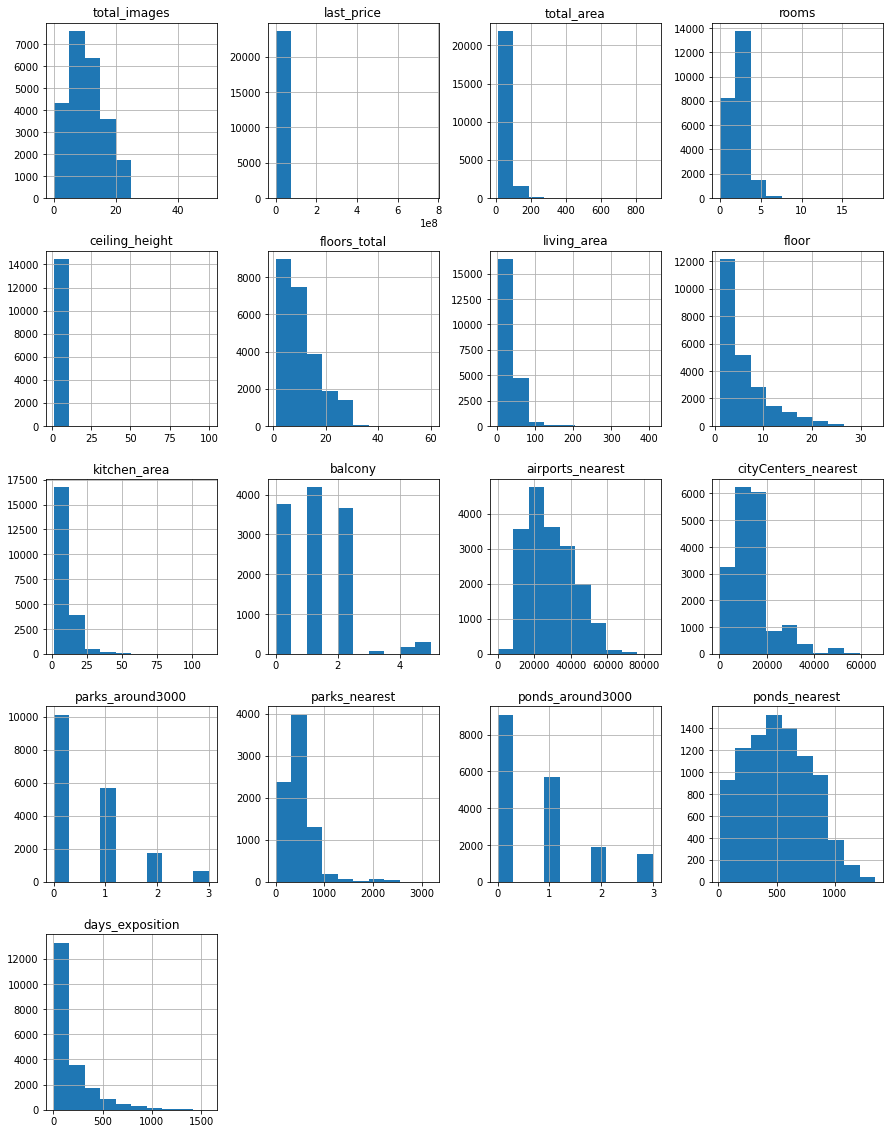

In [4]:
data.hist(figsize=(15, 20));

In [5]:
rows_quantity = data.shape[0]
rows_quantity

23699

На этапе изучения информации о данных был загружен датасет с данными, состоящими из 23 699 объектов и информации о них (местоположении, основных площадях, размерах и этажности, дате публикации объявления, ну и, конечно, стоимости). Было изучено количество и тип данных в каждом столбце, а также построены гистограммы, дающие наглядное представление об объеме данных и их примерном количественном распределении в каждом параметре. 

### Выполните предобработку данных

In [6]:
data.isna().sum()


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [7]:
data['balcony'] = data['balcony'].fillna(value = 0)
for i in data['locality_name'].unique():
    data.loc[(data['locality_name'] == i) & (data['airports_nearest'].isna()), 'airports_nearest'] = data.loc[(data['locality_name'] == i), 'airports_nearest'].mean()
    data.loc[(data['locality_name'] == i) & (data['parks_around3000'].isna()), 'parks_around3000'] = data.loc[(data['locality_name'] == i), 'parks_around3000'].mean()
    data.loc[(data['locality_name'] == i) & (data['ponds_around3000'].isna()), 'ponds_around3000'] = data.loc[(data['locality_name'] == i), 'ponds_around3000'].mean()
    data.loc[(data['locality_name'] == i) & (data['parks_nearest'].isna()), 'parks_nearest'] = data.loc[(data['locality_name'] == i), 'parks_nearest'].mean()
    data.loc[(data['locality_name'] == i) & (data['ponds_nearest'].isna()), 'ponds_nearest'] = data.loc[(data['locality_name'] == i), 'ponds_nearest'].mean()
    data.loc[(data['locality_name'] == i) & (data['cityCenters_nearest'].isna()), 'cityCenters_nearest'] = data.loc[(data['locality_name'] == i), 'cityCenters_nearest'].mean()


In [8]:
#итоговое количество пропусков после обработки
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5394
cityCenters_nearest      5394
parks_around3000         5394
parks_nearest            6032
ponds_around3000         5394
ponds_nearest            5518
days_exposition          3181
dtype: int64

Пропущенные значения были обработаны следующим образом:
    
   1. В столбцах с информацией о наличии балконов пропуски были заменены на ноль. Можно предположить, что данная информация была получена от пользователей, которые в пункте про наличие балкона в квартире могли оставить пропуск, если балкона нет.
   2. Пропуски в остальных столбцах, судя по всему, тоже заполненных пользователями, объясняются недостаточностью информации и человеческими ошибками. Самое большое количество пропусков, к примеру, в столбце с информацией о том, является ли объект апартаментами. Можно предположить, что пользователь просто не владеет данной информацией или считает ее непринципиальной для продажи жилья. Пропуски в данном столбце оставлены без изменений, как и в других столбцах, заполненных пользователями. Что можно было сделать: заполнить жилую площадь и площадь кухни исходя из среднего отношения их величин к общей площади квартиры.
   3. Следующая группа данных с пропусками была восполнена в соответствии с  информацией о местоположении объекта. Судя по всему, эта группа данных получена автоматически на основе картографических данных, и в этом случае пропуски скорее всего появились по техническим причинам, связанным с ошибками при переносе и копировании данных, а также ошибками программистов. Заполнение было произведено на основании среднего числа для объектов, находящихся в том же населенном пункте (не медиана, так как для некоторых районов представлен только один объект). Таким образом была заполнена значительная часть пропущенных значений из столбцов расстояние до центра города и до ближайшего водоема и не очень большая часть пропусков из столбцов Расстояние до аэропорта, Число парков и прудов в радиусе 3 км, а также Расстояние до ближайшего парка.

In [9]:
#Обработка дубликатов в названиях населенных пунктов
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['городской поселок', 'поселок городского типа', 'садовое товарищество', 'садоводческое некоммерческое товарищество', 'коттеджный поселок', 'деревня', 'поселок станции', 'поселок при железнодорожной станции'], 'поселок', regex=True)
    .replace(['село '], 'поселок ', regex=True)
)


   
print(data['locality_name'].unique())

['Санкт-Петербург' 'поселок Шушары' 'поселок Янино-1' 'поселок Парголово'
 'поселок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф' 'Пушкин'
 'поселок Кудрово' 'Коммунар' 'Колпино' 'поселок Красный Бор' 'Гатчина'
 'поселок Федоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'поселок Новое Девяткино' 'поселок Металлострой' 'поселок Лебяжье'
 'поселок Сиверский' 'поселок Молодцово' 'поселок Кузьмоловский'
 'поселок Новая Ропша' 'Павловск' 'поселок Пикколово' 'Всеволожск'
 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк' 'поселок Куттузи'
 'поселок Аннино' 'поселок Ефимовский' 'поселок Плодовое'
 'поселок Заклинье' 'поселок Торковичи' 'поселок Первомайское'
 'Красное Село' 'поселок Понтонный' 'Сясьстрой' 'поселок Старая'
 'поселок Лесколово' 'поселок Новый Свет' 'Сланцы' 'поселок Путилово'
 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское' 'Зеленогорск'
 'Сосновый Бор' 'поселок Оржицы' 'поселок Кальтино' 'Кудрово'
 'поселок Романовка' 'поселок Бугры' 'поселок Рощино' 'Кириши' 'Луга'
 'Волосово' 'Отрадное

In [10]:
#преобразуем тип данных столбцов
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')
data['balcony'] = data['balcony'].astype(int)
data['last_price'] = data['last_price'].astype(int)

In [11]:
#Проверка на явные дубликаты
print(data.duplicated().sum())

0


Выполнено преобразование типов данных в следующих столбцах:

   1. Дата публикации объявления - данные из столбца преобразованы в формат DateTime для упрощения работы с датами.
   2. Столбец с количеством балконов в квартире был преобразован в целочисленный тип, что стало возможным после удаления пропусков.
   3. Тип данных в столбце со стоимостью объекта был преобразован в целочисленный как наиболее подходящий для работы с ценами на недвижимость.

### Добавьте в таблицу новые столбцы

In [12]:
#Добавление столбца в таблицу со стоимостью квадратного метра жилья
data['square_meter_price'] = round(data['last_price'] / data['living_area'], 2)

display(data.head(20))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.00,8,NaN,...,0,Санкт-Петербург,18863.0,16028.0,1.0,482.000000,2.0,755.000000,NaN,254901.96
1,7,3350000,40.40,2018-12-04,1,NaN,11.0,18.60,1,NaN,...,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,573.217105,81.0,180107.53
2,10,5196000,56.00,2015-08-20,2,NaN,5.0,34.30,4,NaN,...,0,Санкт-Петербург,21741.0,13933.0,1.0,90.000000,2.0,574.000000,558.0,151486.88
3,0,64900000,159.00,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,0,Санкт-Петербург,28098.0,6800.0,2.0,84.000000,3.0,234.000000,424.0,NaN
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.00,13,NaN,...,0,Санкт-Петербург,31856.0,8098.0,2.0,112.000000,1.0,48.000000,121.0,312500.00
5,10,2890000,30.40,2018-09-10,1,NaN,12.0,14.40,5,NaN,...,0,поселок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,200694.44
6,6,3700000,37.30,2017-11-02,1,NaN,26.0,10.60,6,NaN,...,1,поселок Парголово,52996.0,19143.0,0.0,501.100000,0.0,598.071429,155.0,349056.60
7,5,7915000,71.60,2019-04-18,2,NaN,24.0,NaN,22,NaN,...,2,Санкт-Петербург,23982.0,11634.0,0.0,498.597886,0.0,520.213955,NaN,NaN
8,20,2900000,33.16,2018-05-23,1,NaN,27.0,15.43,26,NaN,...,0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,187945.56
9,18,5400000,61.00,2017-02-26,3,2.50,9.0,43.60,7,NaN,...,2,Санкт-Петербург,50898.0,15008.0,0.0,498.597886,0.0,520.213955,289.0,123853.21


In [13]:
#Добавление столбцов с днем недели, месяцем и годом появления объявления
data['exposition_weekday'] = data['first_day_exposition'].dt.weekday
data['exposition_month'] = data['first_day_exposition'].dt.month
data['exposition_year'] = data['first_day_exposition'].dt.year
display(data.head(20))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,exposition_weekday,exposition_month,exposition_year
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.00,8,NaN,...,16028.0,1.0,482.000000,2.0,755.000000,NaN,254901.96,3,3,2019
1,7,3350000,40.40,2018-12-04,1,NaN,11.0,18.60,1,NaN,...,18603.0,0.0,NaN,0.0,573.217105,81.0,180107.53,1,12,2018
2,10,5196000,56.00,2015-08-20,2,NaN,5.0,34.30,4,NaN,...,13933.0,1.0,90.000000,2.0,574.000000,558.0,151486.88,3,8,2015
3,0,64900000,159.00,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,6800.0,2.0,84.000000,3.0,234.000000,424.0,NaN,4,7,2015
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.00,13,NaN,...,8098.0,2.0,112.000000,1.0,48.000000,121.0,312500.00,1,6,2018
5,10,2890000,30.40,2018-09-10,1,NaN,12.0,14.40,5,NaN,...,NaN,NaN,NaN,NaN,NaN,55.0,200694.44,0,9,2018
6,6,3700000,37.30,2017-11-02,1,NaN,26.0,10.60,6,NaN,...,19143.0,0.0,501.100000,0.0,598.071429,155.0,349056.60,3,11,2017
7,5,7915000,71.60,2019-04-18,2,NaN,24.0,NaN,22,NaN,...,11634.0,0.0,498.597886,0.0,520.213955,NaN,NaN,3,4,2019
8,20,2900000,33.16,2018-05-23,1,NaN,27.0,15.43,26,NaN,...,NaN,NaN,NaN,NaN,NaN,189.0,187945.56,2,5,2018
9,18,5400000,61.00,2017-02-26,3,2.50,9.0,43.60,7,NaN,...,15008.0,0.0,498.597886,0.0,520.213955,289.0,123853.21,6,2,2017


In [14]:
#тип этажа квартиры (значения — «первый», «последний», «другой»)
def floor_category(row):
    
    floor = row['floor']
    if floor == row['floors_total']:
        return 'Последний'
    if floor == 1:
        return 'Первый'
    return 'Другой'

data['floor_type'] = data.apply(floor_category, axis = 1)
display(data.head(20))
print(data['floor_type'].unique())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,exposition_weekday,exposition_month,exposition_year,floor_type
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.00,8,NaN,...,1.0,482.000000,2.0,755.000000,NaN,254901.96,3,3,2019,Другой
1,7,3350000,40.40,2018-12-04,1,NaN,11.0,18.60,1,NaN,...,0.0,NaN,0.0,573.217105,81.0,180107.53,1,12,2018,Первый
2,10,5196000,56.00,2015-08-20,2,NaN,5.0,34.30,4,NaN,...,1.0,90.000000,2.0,574.000000,558.0,151486.88,3,8,2015,Другой
3,0,64900000,159.00,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,2.0,84.000000,3.0,234.000000,424.0,NaN,4,7,2015,Другой
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.00,13,NaN,...,2.0,112.000000,1.0,48.000000,121.0,312500.00,1,6,2018,Другой
5,10,2890000,30.40,2018-09-10,1,NaN,12.0,14.40,5,NaN,...,NaN,NaN,NaN,NaN,55.0,200694.44,0,9,2018,Другой
6,6,3700000,37.30,2017-11-02,1,NaN,26.0,10.60,6,NaN,...,0.0,501.100000,0.0,598.071429,155.0,349056.60,3,11,2017,Другой
7,5,7915000,71.60,2019-04-18,2,NaN,24.0,NaN,22,NaN,...,0.0,498.597886,0.0,520.213955,NaN,NaN,3,4,2019,Другой
8,20,2900000,33.16,2018-05-23,1,NaN,27.0,15.43,26,NaN,...,NaN,NaN,NaN,NaN,189.0,187945.56,2,5,2018,Другой
9,18,5400000,61.00,2017-02-26,3,2.50,9.0,43.60,7,NaN,...,0.0,498.597886,0.0,520.213955,289.0,123853.21,6,2,2017,Другой


['Другой' 'Первый' 'Последний']


In [15]:
#расстояние до центра города в километрах
data['to_city_center'] = round(data['cityCenters_nearest'] / 1000)
display(data.head(20))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,exposition_weekday,exposition_month,exposition_year,floor_type,to_city_center
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.00,8,NaN,...,482.000000,2.0,755.000000,NaN,254901.96,3,3,2019,Другой,16.0
1,7,3350000,40.40,2018-12-04,1,NaN,11.0,18.60,1,NaN,...,NaN,0.0,573.217105,81.0,180107.53,1,12,2018,Первый,19.0
2,10,5196000,56.00,2015-08-20,2,NaN,5.0,34.30,4,NaN,...,90.000000,2.0,574.000000,558.0,151486.88,3,8,2015,Другой,14.0
3,0,64900000,159.00,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,84.000000,3.0,234.000000,424.0,NaN,4,7,2015,Другой,7.0
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.00,13,NaN,...,112.000000,1.0,48.000000,121.0,312500.00,1,6,2018,Другой,8.0
5,10,2890000,30.40,2018-09-10,1,NaN,12.0,14.40,5,NaN,...,NaN,NaN,NaN,55.0,200694.44,0,9,2018,Другой,NaN
6,6,3700000,37.30,2017-11-02,1,NaN,26.0,10.60,6,NaN,...,501.100000,0.0,598.071429,155.0,349056.60,3,11,2017,Другой,19.0
7,5,7915000,71.60,2019-04-18,2,NaN,24.0,NaN,22,NaN,...,498.597886,0.0,520.213955,NaN,NaN,3,4,2019,Другой,12.0
8,20,2900000,33.16,2018-05-23,1,NaN,27.0,15.43,26,NaN,...,NaN,NaN,NaN,189.0,187945.56,2,5,2018,Другой,NaN
9,18,5400000,61.00,2017-02-26,3,2.50,9.0,43.60,7,NaN,...,498.597886,0.0,520.213955,289.0,123853.21,6,2,2017,Другой,15.0


### Проведите исследовательский анализ данных

Данные в значимых для исследования столбцах необходимо оценить на предмет разброса значений и выявить аномалии. По возможности восстановить корректное значение либо удалить данные с аномальными значениями.
Первый столбец данных для анализа - общая площадь. Разброс данных тут очень большой, но основная часть находится в диапазоне от 40 до 69 квадратных метров. Трудно оценить предел аномальности значений и тем более их скорректировать. Что было сделано: удалены строки со значением общей площади более 350 квадратных метров, которых было очень мало (41 строка) и их удаление не влияет на статистику (как видно из переменной filtered_rows, после удаления осталось больше 99% данных).
Остальные данные, сильно отличающиеся от средней квартили, были оставлены неизмененными, исходя из предположения, что в жилищном фонде вполне могут присутствовать объекты с большой площадью.
Что можно было бы сделать: скорректировать общую площадь, исходя из среднего значения для категории объектов по количеству комнат.

count    23658.000000
mean        59.671705
std         31.459337
min         12.000000
25%         40.000000
50%         52.000000
75%         69.600000
max        347.500000
Name: total_area, dtype: float64
0.9982699691970125


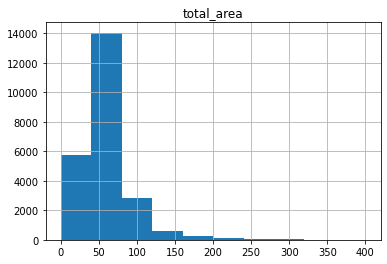

In [16]:
data.hist('total_area', range = (0, 400))
data = data.loc[data['total_area'] < 350 ]
print(data['total_area'].describe())
filtered_rows = data.shape[0]
print(filtered_rows/rows_quantity)

С жилой площадью дело обстоит похожим образом. При ближайшем рассмотрении данного столбца можно отследить, что основная часть данных находится в диапазоне 18 - 42 квадратных метра. Условной границей отсечения аномалий выбрано значение в 170 кв.м., так как объектов с большей жилой площадью менее 1% от общего количества (45 объектов).

count    21767.000000
mean        34.171298
std         20.409059
min          2.000000
25%         18.600000
50%         30.000000
75%         42.200000
max        260.000000
Name: living_area, dtype: float64
0.996328959027807


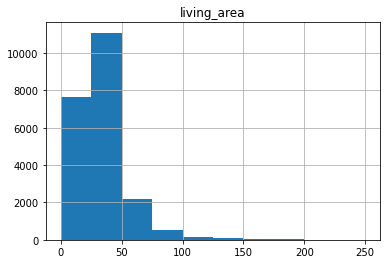

In [17]:
#Жилая площадь
data.hist('living_area', range = (0, 250))
print(data['living_area'].describe())
data = data.loc[(data['living_area'] < 170) | (data['living_area'].isna())]

filtered_rows2 = data.shape[0]
print(filtered_rows2/rows_quantity)

Основной разброс значений в площади кухни находится в диапазоне от 7 до 12 квадратных метров, но есть и аномалии с маленькой площадью (не нулевой) и большой (до 72 кв.м). Было решено отбросить объекты со значениями площади кухни более 90 кв.м (их всего 4), при этом не отбрасывая значения с пропусками, в целях большей однородности данных для проведения анализа.

count    21349.000000
mean        10.491267
std          5.654681
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64
0.9961601755348327


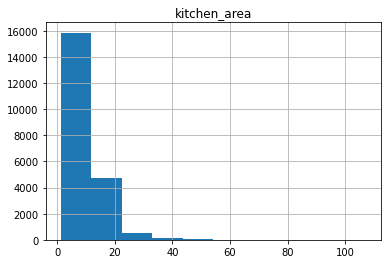

In [18]:
# Площадь кухни
data.hist('kitchen_area')
print(data['kitchen_area'].describe())
data = data.loc[(data['kitchen_area'] < 90) | (data['kitchen_area'].isna())]
print(data.shape[0]/rows_quantity)

Цена объекта может зависеть от огромного количества факторов, указанных в изначальной таблице с данными. Огромный разброс и наличие аномалий в большом количестве столбцов, а также разные населенные пункты и другие критерии не могут не влиять на большую разницу минимальной и максимальной стоимости объекта. Однако, из данных удалены 17 объектов, стоимость которых была точечно разбросана в верхнем максимуме. Их наличие оказывало значительно влияние на выявление зависимостей общей стоимости от различных факторов. После применения фильтра осталось около 99% данных.

count    2.360800e+04
mean     6.235005e+06
std      7.290844e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.600000e+06
75%      6.727650e+06
max      3.300000e+08
Name: last_price, dtype: float64
0.9952740621967172


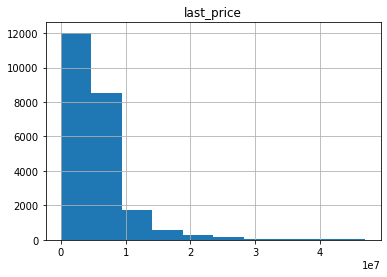

In [19]:
#Цена объекта
data.hist('last_price', range = (0, 4.700000e+07))
print(data['last_price'].describe())
data = data.loc[data['last_price'] < 9.300000e+07]
print(data.shape[0]/rows_quantity)

Количество комнат начинается от одной и доходит до 11. Если принимать во внимание самые большие по площади объекты, этот признак не выбивается из общей картины.

count    23587.000000
mean         2.052317
std          1.030680
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         14.000000
Name: rooms, dtype: float64


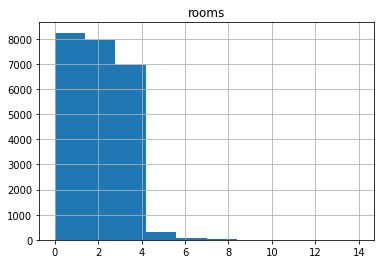

In [20]:
#Количество комнат
data.hist('rooms')
print(data['rooms'].describe())

Высота потолков более 20 метров была обработана исходя из предположения, что, заполняя эту информацию, пользователь мог ошибиться с десятичной запятой. Данные были скорректированы.

count    14433.000000
mean         2.767628
std          1.262122
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64


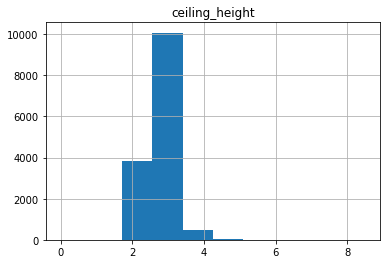

In [21]:
#Высота потолков
data.hist('ceiling_height', range = (0, 8.5))
print(data['ceiling_height'].describe())

data['ceiling_height'] = data['ceiling_height'].apply(lambda x: x/10 if x>=20 else x)


Для визуализации данных о типах этажей объектов была составлена сводная таблица для каждой категории, а затем построен столбчатый график. Как видно из приведенного ниже анализа, большее количество объектов приходится на "Другой" (то есть не первый и не последний этаж), далее идут объекты на последнем этаже, а меньше всего объектов находятся на первом.

,Количество
floor_type,
Другой,15174
Первый,2448
Последний,2807


<AxesSubplot:xlabel='floor_type'>

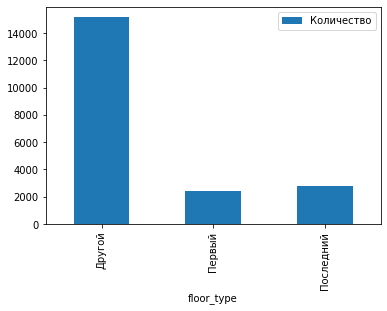

In [22]:
#тип этажа квартиры

floor_type = data.pivot_table(index = 'floor_type', values = 'days_exposition', aggfunc = 'count')
floor_type.columns = ['Количество']
display(floor_type)
floor_type.plot(kind = 'bar')

Были удалены объекты с общим количеством этажей в доме более 37, так как я проверила, что в Санкт-Петербурге нет жилых домов большей этажности. После проведения последней фильтрации осталось более 99% данных.


count    23498.000000
mean        10.688612
std          6.586959
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         36.000000
Name: floors_total, dtype: float64
0.9951474745769864


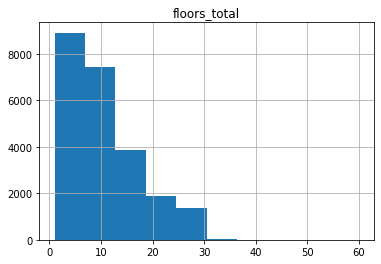

In [23]:
#общее количество этажей в доме
data.hist('floors_total')
data = data.loc[(data['floors_total'] < 37) | (data['floors_total'].isna())]
print(data['floors_total'].describe())
print(data.shape[0]/rows_quantity)


Разброс расстояния от центра города (Санкт-Петербург) объясняется большим количеством населенных пунктов в данных, для минимального это центр города, максимальное расстояние тоже вполне вписывается в местоположение объектов.

count    18190.000000
mean     14278.274555
std       8615.475471
min        181.000000
25%       9399.000000
50%      13139.000000
75%      16360.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64


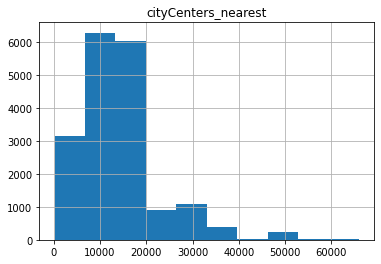

In [24]:
#расстояние до центра города в метрах
data.hist('cityCenters_nearest')
print(data['cityCenters_nearest'].describe())

Расстояние до ближайшего парка, судя по всему, как и другие данные о расстояниях, получены автоматически из геосервисов. Сильно отличающиеся от средних данные оставлены без изменений.

count    17552.000000
mean       492.579376
std        231.932596
min          1.000000
25%        447.000000
50%        498.597886
75%        498.597886
max       3190.000000
Name: parks_nearest, dtype: float64

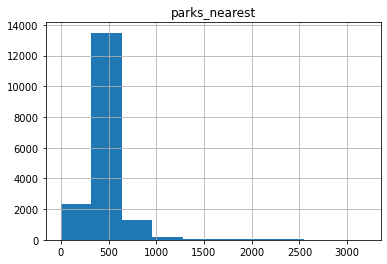

In [25]:
#расстояние до ближайшего парка
data.hist('parks_nearest')
data['parks_nearest'].describe()

Среднее количество дней, которое были размещены объявления: 180.35738764319984
Медианное количество дней, которое были размещены объявления: 95.0
count    20426.000000
mean       180.357388
std        219.155493
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64


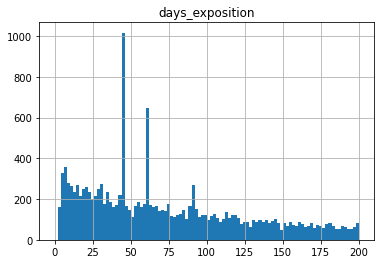

In [26]:
#Изучите, как быстро продавались квартиры
data.hist('days_exposition', bins = 100, range = (0, 200))
print('Среднее количество дней, которое были размещены объявления:', data['days_exposition'].mean())
print('Медианное количество дней, которое были размещены объявления:', data['days_exposition'].median())
print(data['days_exposition'].describe())

Медианное значение, по которому можно судить о стандартном времени продажи объекта, - 102 дня. Среднее значение превышает данный показатель, значит, некоторые объекты продаются сильно дольше остальных. Быстрыми можно считать продажи квартир, входящих в первую квартиль, то есть до 44 дней. Как видно из гистограммы при ближайшем рассмотрении, количество продаваемых квартир снижается со временем, постепенно выходя на плато после 100 дней. Есть несколько всплесков количества проданных объектов в следующие промежутки времени: самый явный около 45 дней после размещения объявления (количество квартир более 1000), меньший примерно на отметке в 60 дней и еще меньший предположительно через 80-85 дней. 
Необычно долгими можно считать сроки продажи более 400 - 500 дней (они не вошли в масштаб графика).

0.7536890583648794


,last_price
total_area,
12.0,2400000.0
13.0,2350000.0
13.2,1686000.0
14.0,1190000.0
15.0,1725000.0
...,...
300.0,64500000.0
301.9,30000000.0
312.0,24900000.0


<AxesSubplot:title={'center':'Зависимость стоимости от общей площади'}, xlabel='last_price', ylabel='total_area'>

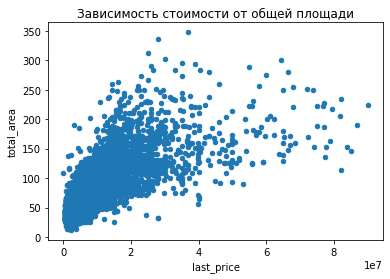

In [27]:
#Факторы, которые больше всего влияют на общую (полную) стоимость объекта

print(data['last_price'].corr(data['total_area']))
total_area_price_data = data.pivot_table(index = 'total_area', values = 'last_price')
display(total_area_price_data)

data.plot(x = 'last_price', y = 'total_area', kind = 'scatter', title = 'Зависимость стоимости от общей площади')

Как и ожидалось, общая стоимость объекта зависит от общей площади: при ее повышении повышается и цена. Как видно из графика и рассчитанного коэффициента корреляции, зависимость достаточно сильная.

0.6538593046439142


,last_price
living_area,
2.0,4340000.0
3.0,34715000.0
5.0,2680000.0
5.4,6100000.0
6.0,3799000.0
...,...
165.0,77000000.0
165.5,19700000.0
166.7,16000000.0


<AxesSubplot:title={'center':'Зависимость стоимости от жилой площади'}, xlabel='last_price', ylabel='living_area'>

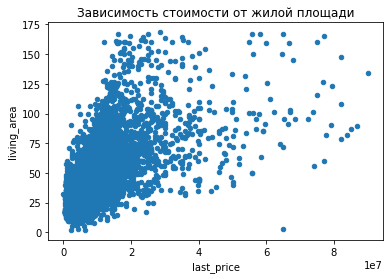

In [28]:
print(data['last_price'].corr(data['living_area']))
living_area_price_data = data.pivot_table(index = 'living_area', values = 'last_price')
display(living_area_price_data)

data.plot(x = 'last_price', y = 'living_area', kind = 'scatter', title = 'Зависимость стоимости от жилой площади')



Размер жилой площади тоже оказывает влияние на стоимость объекта, но уже в меньшей степени, чем общая площадь (коэффициенты корреляции 0,65 и 0,75 соответственно).

0.5722074226392165


,last_price
kitchen_area,
1.30,4.250000e+06
2.00,2.821429e+06
2.30,2.940000e+06
2.40,2.200000e+06
2.89,5.967734e+06
...,...
65.00,2.315000e+07
70.00,2.430000e+07
75.00,4.700000e+07


<AxesSubplot:title={'center':'Зависимость стоимости от площади кухни'}, xlabel='last_price', ylabel='kitchen_area'>

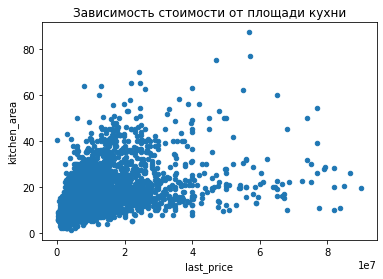

In [29]:
print(data['last_price'].corr(data['kitchen_area']))
kitchen_area_price_data = data.pivot_table(index = 'kitchen_area', values = 'last_price')
display(kitchen_area_price_data)

data.plot(x = 'last_price', y = 'kitchen_area', kind = 'scatter', title = 'Зависимость стоимости от площади кухни')



Выявлена прямая корреляция стоимости квартиры и площади кухни (отражена на графике рассеяния). Коэффициент корреляции еще ниже, чем у жилой площади, следовательно, зависимость еще более слабая.

0.46285646045274514


,last_price
rooms,
0,2.992508e+06
1,3.830419e+06
2,5.548501e+06
3,7.973590e+06
4,1.220354e+07
5,1.720644e+07
6,2.213489e+07
7,2.185917e+07
8,2.355571e+07


<AxesSubplot:title={'center':'Зависимость стоимости от количества комнат'}, xlabel='rooms'>

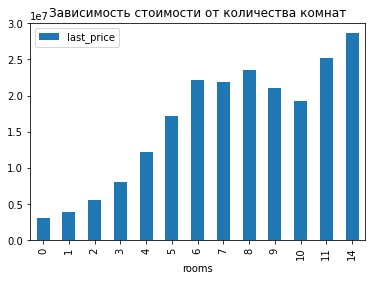

In [30]:
print(data['last_price'].corr(data['rooms']))
rooms_price_data = data.pivot_table(index = 'rooms', values = 'last_price')
display(rooms_price_data)

rooms_price_data.plot(kind = 'bar', title = 'Зависимость стоимости от количества комнат')


Зависимость стоимости объекта от количества комнат тоже присутствует, что видно на графике и по коэффициенту корреляции. Хотя можно отследить повышение стоимости квартир от 0 до 6 комнат, далее разница незначительна, а для квартир с 10 комнатами средняя цена даже ниже. Стоимость квартир с большим количеством комнат (11 и более) наиболее высокая на графике.

,last_price
floor_type,
Другой,6.370887e+06
Первый,4.704926e+06
Последний,5.983538e+06


<AxesSubplot:title={'center':'Стоимость в зависимости от категории этажа'}, xlabel='floor_type'>

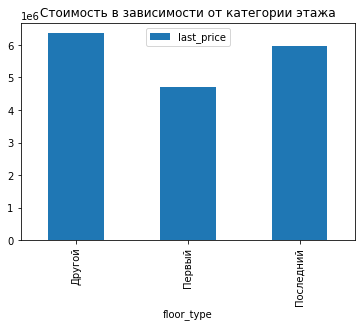

In [31]:
#тип этажа
floor_price = data.pivot_table(index = 'floor_type', values = 'last_price')
display(floor_price)
floor_price.plot(kind = 'bar', title = 'Стоимость в зависимости от категории этажа')

На графике видно, что квартиры на первом этаже стоят в среднем значительно дешевле, чем на других и последнем этажах, а вот разница между последними двумя категориями незначительна и может быть объяснена неоднородностью выборок (квартир на других этажах значительно больше).

,last_price
exposition_weekday,
0,6.139313e+06
1,6.110702e+06
2,6.102214e+06
3,6.348461e+06
4,6.016775e+06
5,5.952093e+06
6,5.896236e+06


<AxesSubplot:title={'center':'Динамика стоимости объектов по дням недели'}, xlabel='exposition_weekday'>

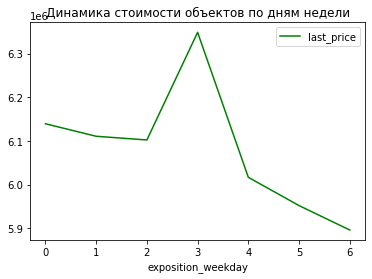

In [32]:
#день недели публикации объявления
weekday_price = data.pivot_table(index = 'exposition_weekday', values = 'last_price')
display(weekday_price)
weekday_price.plot(color = 'g', title = 'Динамика стоимости объектов по дням недели')

На графике видно, что в объявлениях, опубликованных в субботу, указана наиболее низкая средняя стоимость квартир, а в среду наиболее высокая. Данная гипотеза требует проверки.

,last_price
exposition_month,
1,6.231073e+06
2,6.144806e+06
3,5.945956e+06
4,6.063712e+06
5,6.088714e+06
6,6.025767e+06
7,6.123309e+06
8,6.071049e+06
9,6.251461e+06


<AxesSubplot:title={'center':'Динамика стоимости объектов по месяцам'}, xlabel='exposition_month'>

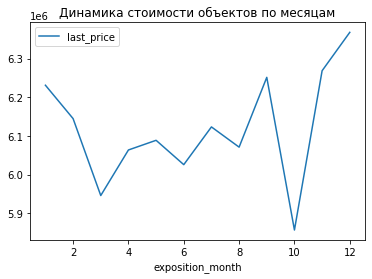

In [33]:
#месяц публикации объявления
month_price = data.pivot_table(index = 'exposition_month', values = 'last_price')
display(month_price)
month_price.plot(title = 'Динамика стоимости объектов по месяцам')

Судя по приведенному ниже графику, средняя стоимость квартир в объявлениях, опубликованных в октябре, наиболее низкая, а в последние два месяца сильно повышается к своему максимуму в декабре. Январь также характеризуется достаточно высокими значениями. То есть пик цен приходится на конец и начало года. Причины такой неоднородности в данных требуют дальнейшего исследования.

,last_price
exposition_year,
2014,7700000
2015,5300000
2016,4500000
2017,4500000
2018,4550000
2019,5042500


,total_area
exposition_year,
2014,76.26
2015,60.00
2016,53.00
2017,51.80
2018,50.40
2019,51.70


<AxesSubplot:title={'center':' Динамика площади продаваемых квартир'}, xlabel='exposition_year'>

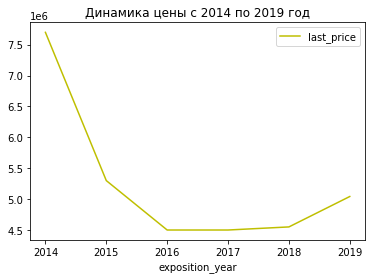

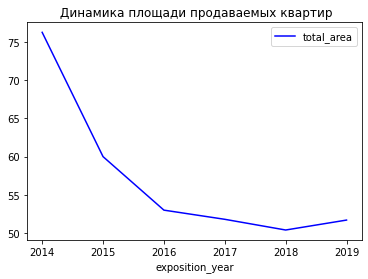

In [34]:
#год публикации объявления
year_price = data.pivot_table(index = 'exposition_year', values = 'last_price', aggfunc = 'median')
display(year_price)
area_price = data.pivot_table(index = 'exposition_year', values = 'total_area', aggfunc = 'median')
display(area_price)
year_price.plot(color = 'y', title = 'Динамика цены с 2014 по 2019 год')
area_price.plot(color = 'b', title = ' Динамика площади продаваемых квартир')

Видно, что не только средняя стоимость квартир, но и общая площадь продаваемых объектов с 2014 до 2018 года упали, причем за год достаточно резко, потом снижение происходило более плавно. Затем к 2019 году оба этих показателя пошли на плавное повышение. Данная гипотеза предоставляет простор для дальнейших исследований рынка и изменения цен на недвижимость.

In [35]:
#Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений
largest_number = data.pivot_table(index = 'locality_name', values = 'square_meter_price', aggfunc = ['count', 'median']).sort_values(by = ('count', 'square_meter_price'), ascending = False).head(10)
largest_number.columns = ['Количество объявлений', 'Медианная цена квадратного метра']
display(largest_number.sort_values(by = 'Медианная цена квадратного метра', ascending = False))


,Количество объявлений,Медианная цена квадратного метра
locality_name,,
поселок Парголово,301,199500.000
Санкт-Петербург,14485,188888.890
поселок Кудрово,262,185655.695
Пушкин,343,181914.890
поселок Мурино,492,172446.515
поселок Шушары,404,144803.590
Петергоф,197,140957.450
Колпино,328,125677.795
Всеволожск,371,124137.930


В таблице выше приведены населенные пункты с наибольшим количеством объявлений в порядке убывания цены за квадратный метр. Как и ожидалось, самая высокая средняя стоимость в Санкт-Петербурге, а вот медианная выше в поселке Парголово.  На последнем месте - город Выборг.

,last_price
to_city_center,
0.0,2.380505e+07
1.0,1.411865e+07
2.0,1.442682e+07
3.0,1.038929e+07
4.0,1.131852e+07
5.0,1.216814e+07
6.0,1.251523e+07
7.0,1.369637e+07
8.0,9.104143e+06


<AxesSubplot:title={'center':'Стоимость квартир по мере удаления от центра'}, xlabel='to_city_center'>

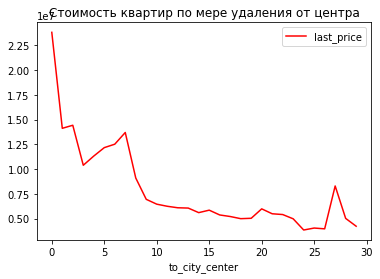

In [36]:
#Квартиры в Санкт-Петербурге со средней стоимостью на разном удалении от центра
spb_objects = data[data['locality_name'] == 'Санкт-Петербург'].pivot_table(index = 'to_city_center', values = 'last_price', aggfunc = 'mean')
display(spb_objects.sort_values(by = 'to_city_center'))
spb_objects.plot(color = 'r', title = 'Стоимость квартир по мере удаления от центра')

В таблице приведены данные о средней стоимости квартир в Санкт-Петербурге по мере удаления от центра города. График демонстрирует обратную зависимость: чем ближе к центру находится объект, тем стоимость его выше. Небольшие всплески стоимости также находятся на расстоянии примерно 6 км и 26-27 км от центра города, что может быть объяснено другими факторами (благополучным районом с развитой инфраструктурой или современным жилым комплексом более высокого класса на некотором удалении от центра).

### Напишите общий вывод

Было проведено исследование массива из 23699 строк данных о продаже квартир в Санкт-Петербурге и его окрестностях (до 60 км), которые были получены из двух источников: заполнены пользователями лично и автоматически сформированы на основе картографических данных. Целью данного исследования было выявления аномалий в целях предотвращения мошенничества, а также выявление факторов, оказывающих влияние на итоговую стоимость объекта.

На начальном этапе был изучен тип данных в каждом столбце и их объемы через построение гистограмм для каждого столбца.
На этапе предобработки данных были проведены следующие этапы:

   1. Обработка пропусков (исправление на 0 в случае с количеством балконов, не указанных пользователем при их отсутствии, и заполнение средним значением на основе картографических данных о местоположении).
   2. Изменение типов данных в столбцах, где возможно, для облегчения работы с ними (тип даты и целочисленный тип).
   3. Добавление новых столбцов с полученными данными: день недели, месяц и год публикации объявления, стоимость квадратного метра жилья, расстояние до центра города в километрах, тип этажа, на котором находится объект. Новые данные в дальнейшем будут использованы для проведения анализа.
   4. Обработка дубликатов в названиях населенных пунктов путем унификации названий.
    
На этапе исследования была проведена обработка аномалий. Путем построения количественных гистограмм выявлены аномальные значения, оценена их доля в общем массиве данных. Крайние значения были отфильтрованы с соблюдением условия их небольшой доли. После отсечения аномалий зависимости стали прослеживаться отчетливее. Аномалии в высоте потолков были обработаны особым образом: добавлена десятичная запятая исходя из предположения об ошибках заполнения.

Затем последовал этап выявления зависимостей стоимости квартиры от различных параметров. Были построены графики зависимостей, а также посчитаны коэффициенты корреляции, где это возможно. Были выявлены зависимости (по мере уменьшения коэффициента) от общей площади, жилой площади и размера кухни. Зависимость от количества комнат наблюдается для квартир с количеством комнат от 1 до 3, далее она ослабевает. Также была выявлена более низкая стоимость для объектов, расположенных на первом этаже, по сравнению с другими. Были выдвинуты гипотезы касательно зависимости стоимости квартиры от дня недели, месяца и года публикации объявления. Они требуют дальнейших проверок и исследований:

   1. В среду - более высокая стоимость, в субботу - более низкая.
   
   2. Пик стоимости объектов приходится на объявления конца и начала года, а в октябре эта стоимость минимальная.

   3. С 2014 до 2018 года наблюдается площади продаваемых объектов, что приводит и к снижению их стоимости. К 2019 году начинается плавное повышение обоих параметров.

На заключительном этапе были выявлены десять населенных пунктов с наибольшим количеством объявлений, из которых выделены пункты с наиболее высокой (ожидаемо Санкт-Петербург) и низкой (Выборг) стоимостью квадратного метра. Также было проанализировано изменение общей стоимости квартир по мере удаления от центра города Санкт-Петербург. Стоимость ожидаемо снижалась с небольшими всплесками на удалении в 6 и 26-27 километров.